In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv("ecommerce_furniture_2024.csv")

In [88]:
df

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
...,...,...,...,...,...
1995,Modern TV Stand Entertainment Center with Two ...,NaN,$72.49,8,Free shipping
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",NaN,$276.65,2,Free shipping
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",NaN,$196.44,10,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,NaN,$228.18,0,Free shipping


In [89]:
print("\nchecking Missing values after cleaning:\n", df.isnull().sum())


checking Missing values after cleaning:
 productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64


In [90]:
df.dropna(inplace=True)

In [91]:
df

,productTitle,originalPrice,price,sold,tagText
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...","$1,294.04",$123.4,53,Free shipping
7,"Living Room Furniture, Modern 3-Piece Includin...","$1,474.17",$734.58,5,Free shipping
20,7-piece patio furniture set modular wicker out...,$671.47,$331.24,39,Free shipping
...,...,...,...,...,...
1938,"5 Piece Patio Conversation Set, Wicker Rattan ...",$392.22,$232.83,5,Free shipping
1948,Vanity Table Set with Mirror 2 Storage Drawer ...,$135.02,$102.02,1,Free shipping
1955,"White Vanity Desk with Mirror, Lights and Char...",$950.85,$188.67,11,Free shipping
1964,PP Folding Stools Portable Lightweight Chairs ...,$7.27,$1.27,9,Free shipping


In [92]:
df['price'] = df['price'].replace('[\\$]','', regex = True).str.replace(',', '').str.strip()
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df['originalPrice'] = df['originalPrice'].replace('[\\$,]', '', regex=True).str.replace(',', '').str.strip()
df['originalPrice'] = pd.to_numeric(df['originalPrice'], errors='coerce')

In [93]:
df

,productTitle,originalPrice,price,sold,tagText
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53,Free shipping
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5,Free shipping
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39,Free shipping
...,...,...,...,...,...
1938,"5 Piece Patio Conversation Set, Wicker Rattan ...",392.22,232.83,5,Free shipping
1948,Vanity Table Set with Mirror 2 Storage Drawer ...,135.02,102.02,1,Free shipping
1955,"White Vanity Desk with Mirror, Lights and Char...",950.85,188.67,11,Free shipping
1964,PP Folding Stools Portable Lightweight Chairs ...,7.27,1.27,9,Free shipping


In [94]:
df['discountPercent'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100
df['discountPercent'] = df['discountPercent'].round(2)

In [95]:
df

,productTitle,originalPrice,price,sold,tagText,discountPercent
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping,49.67
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping,56.23
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53,Free shipping,90.46
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5,Free shipping,50.17
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39,Free shipping,50.67
...,...,...,...,...,...,...
1938,"5 Piece Patio Conversation Set, Wicker Rattan ...",392.22,232.83,5,Free shipping,40.64
1948,Vanity Table Set with Mirror 2 Storage Drawer ...,135.02,102.02,1,Free shipping,24.44
1955,"White Vanity Desk with Mirror, Lights and Char...",950.85,188.67,11,Free shipping,80.16
1964,PP Folding Stools Portable Lightweight Chairs ...,7.27,1.27,9,Free shipping,82.53


In [96]:
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())

Dataset shape: (487, 6)

Missing values:
 productTitle       0
originalPrice      0
price              0
sold               0
tagText            0
discountPercent    0
dtype: int64

Summary statistics:
        originalPrice        price          sold  discountPercent
count     487.000000   487.000000    487.000000       487.000000
mean      256.028090   120.593162     75.667351        47.208932
std       422.737861   179.599224    510.047670        18.510598
min         3.630000     0.990000      0.000000         0.000000
25%        31.770000    19.995000      4.000000        41.410000
50%        88.310000    44.620000     10.000000        48.630000
75%       314.125000   161.565000     28.000000        55.840000
max      3265.130000  1529.580000  10000.000000        91.460000


In [97]:
df['Shipping type'] = df['tagText'].apply(lambda x: 'Free Shipping' if 'Free' in str(x) else 'Paid Shipping')

In [98]:
df

,productTitle,originalPrice,price,sold,tagText,discountPercent,Shipping type
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping,49.67,Free Shipping
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping,56.23,Free Shipping
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53,Free shipping,90.46,Free Shipping
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5,Free shipping,50.17,Free Shipping
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39,Free shipping,50.67,Free Shipping
...,...,...,...,...,...,...,...
1938,"5 Piece Patio Conversation Set, Wicker Rattan ...",392.22,232.83,5,Free shipping,40.64,Free Shipping
1948,Vanity Table Set with Mirror 2 Storage Drawer ...,135.02,102.02,1,Free shipping,24.44,Free Shipping
1955,"White Vanity Desk with Mirror, Lights and Char...",950.85,188.67,11,Free shipping,80.16,Free Shipping
1964,PP Folding Stools Portable Lightweight Chairs ...,7.27,1.27,9,Free shipping,82.53,Free Shipping


In [99]:
df['Revenue'] = df['price'] * df['sold']
df['Discount Amount'] = (df['originalPrice'] - df['price']) * df['sold']

In [100]:
df

,productTitle,originalPrice,price,sold,tagText,discountPercent,Shipping type,Revenue,Discount Amount
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping,49.67,Free Shipping,276.22,272.58
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping,56.23,Free Shipping,21.37,27.45
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53,Free shipping,90.46,Free Shipping,6540.20,62043.92
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5,Free shipping,50.17,Free Shipping,3672.90,3697.95
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39,Free shipping,50.67,Free Shipping,12918.36,13268.97
...,...,...,...,...,...,...,...,...,...
1938,"5 Piece Patio Conversation Set, Wicker Rattan ...",392.22,232.83,5,Free shipping,40.64,Free Shipping,1164.15,796.95
1948,Vanity Table Set with Mirror 2 Storage Drawer ...,135.02,102.02,1,Free shipping,24.44,Free Shipping,102.02,33.00
1955,"White Vanity Desk with Mirror, Lights and Char...",950.85,188.67,11,Free shipping,80.16,Free Shipping,2075.37,8383.98
1964,PP Folding Stools Portable Lightweight Chairs ...,7.27,1.27,9,Free shipping,82.53,Free Shipping,11.43,54.00


In [101]:
df['profit/loss'] = (df['Revenue'] - df['Discount Amount'])

In [102]:
df

,productTitle,originalPrice,price,sold,tagText,discountPercent,Shipping type,Revenue,Discount Amount,profit/loss
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping,49.67,Free Shipping,276.22,272.58,3.64
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping,56.23,Free Shipping,21.37,27.45,-6.08
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53,Free shipping,90.46,Free Shipping,6540.20,62043.92,-55503.72
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5,Free shipping,50.17,Free Shipping,3672.90,3697.95,-25.05
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39,Free shipping,50.67,Free Shipping,12918.36,13268.97,-350.61
...,...,...,...,...,...,...,...,...,...,...
1938,"5 Piece Patio Conversation Set, Wicker Rattan ...",392.22,232.83,5,Free shipping,40.64,Free Shipping,1164.15,796.95,367.20
1948,Vanity Table Set with Mirror 2 Storage Drawer ...,135.02,102.02,1,Free shipping,24.44,Free Shipping,102.02,33.00,69.02
1955,"White Vanity Desk with Mirror, Lights and Char...",950.85,188.67,11,Free shipping,80.16,Free Shipping,2075.37,8383.98,-6308.61
1964,PP Folding Stools Portable Lightweight Chairs ...,7.27,1.27,9,Free shipping,82.53,Free Shipping,11.43,54.00,-42.57


In [103]:
df['status'] = np.where(df['profit/loss'] < 0, 'Loss',
                        np.where(df['profit/loss'] > 0, 'Profit', 'Break-even'))


In [104]:
df

,productTitle,originalPrice,price,sold,tagText,discountPercent,Shipping type,Revenue,Discount Amount,profit/loss,status
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping,49.67,Free Shipping,276.22,272.58,3.64,Profit
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping,56.23,Free Shipping,21.37,27.45,-6.08,Loss
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53,Free shipping,90.46,Free Shipping,6540.20,62043.92,-55503.72,Loss
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5,Free shipping,50.17,Free Shipping,3672.90,3697.95,-25.05,Loss
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39,Free shipping,50.67,Free Shipping,12918.36,13268.97,-350.61,Loss
...,...,...,...,...,...,...,...,...,...,...,...
1938,"5 Piece Patio Conversation Set, Wicker Rattan ...",392.22,232.83,5,Free shipping,40.64,Free Shipping,1164.15,796.95,367.20,Profit
1948,Vanity Table Set with Mirror 2 Storage Drawer ...,135.02,102.02,1,Free shipping,24.44,Free Shipping,102.02,33.00,69.02,Profit
1955,"White Vanity Desk with Mirror, Lights and Char...",950.85,188.67,11,Free shipping,80.16,Free Shipping,2075.37,8383.98,-6308.61,Loss
1964,PP Folding Stools Portable Lightweight Chairs ...,7.27,1.27,9,Free shipping,82.53,Free Shipping,11.43,54.00,-42.57,Loss


In [105]:
#Profit and loss Status
status_counts = df['status'].value_counts()
print(status_counts)

status
Profit        252
Loss          227
Break-even      8
Name: count, dtype: int64


In [106]:
#Total Revenue
total_revenue = df['Revenue'].sum()
print(total_revenue)

1183789.27


In [107]:
#Total loss
total_loss = df.loc[df['status'] == 'Loss', 'profit/loss'].sum()
print("Total Loss:", total_loss)

Total Loss: -506996.05999999994


In [108]:
#Total profit
total_profit = df.loc[df['status'] == 'Profit', 'profit/loss'].sum()
print("Total profit:", total_profit)

Total profit: 204130.27999999997


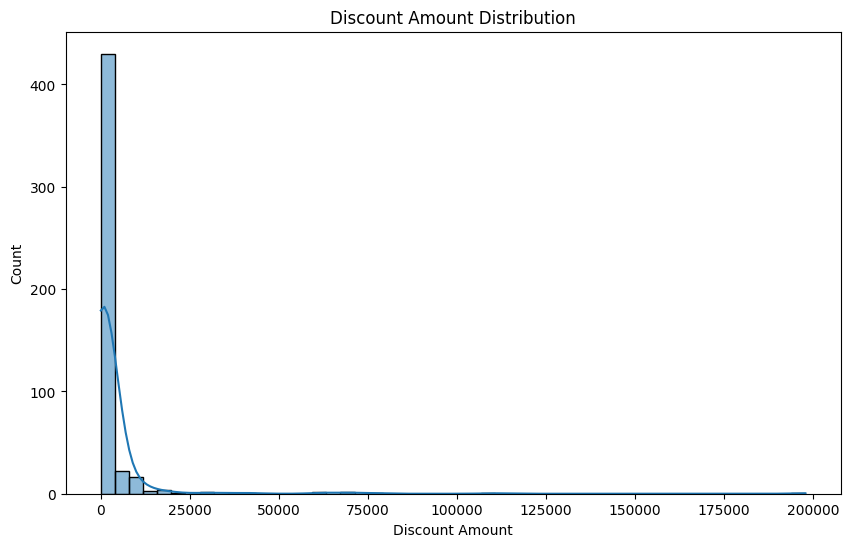

In [109]:
# Discount Amount distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Discount Amount'].dropna(), bins=50, kde=True)
plt.title('Discount Amount Distribution')
plt.xlabel('Discount Amount')
plt.ylabel('Count')
plt.show()

C:\Users\Ayush Sharma\AppData\Local\Temp\ipykernel_20732\4253067549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='productTitle', data=top_revenue, palette="mako")


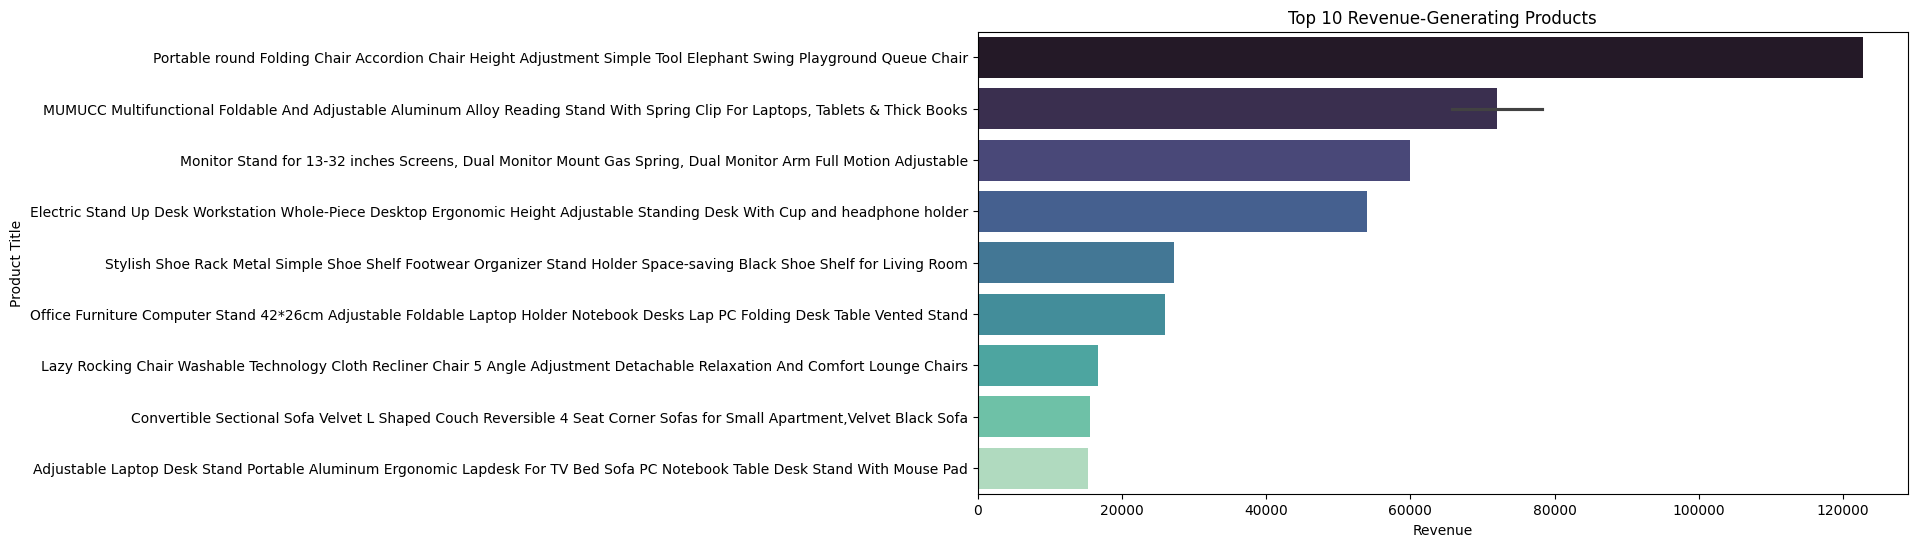

In [110]:

# Top 10 revenue-generating products
top_revenue = df.sort_values(by='Revenue', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Revenue', y='productTitle', data=top_revenue, palette="mako")
plt.title('Top 10 Revenue-Generating Products')
plt.xlabel('Revenue')
plt.ylabel('Product Title')
plt.show()

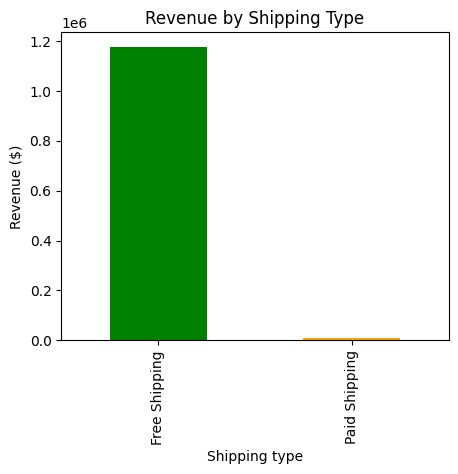

In [111]:
# 3. Revenue by Shipping Type
shipping_revenue = df.groupby('Shipping type')['Revenue'].sum()
plt.figure(figsize=(5,4))
shipping_revenue.plot(kind='bar', color=['green','orange'])
plt.title("Revenue by Shipping Type")
plt.ylabel("Revenue ($)")
plt.show()

In [112]:
status_counts = df['status'].value_counts()

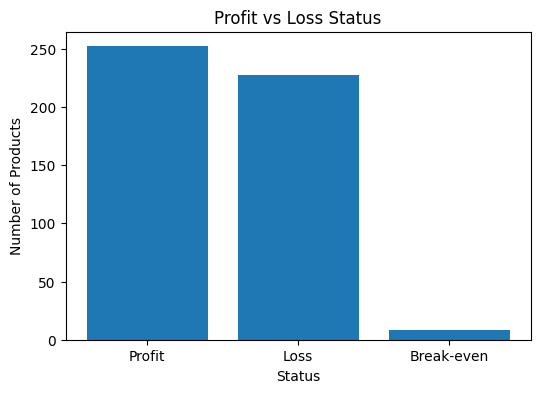

In [113]:
# Bar Chart
plt.figure(figsize=(6,4))
plt.bar(status_counts.index, status_counts.values)
plt.xlabel("Status")
plt.ylabel("Number of Products")
plt.title("Profit vs Loss Status")
plt.show()


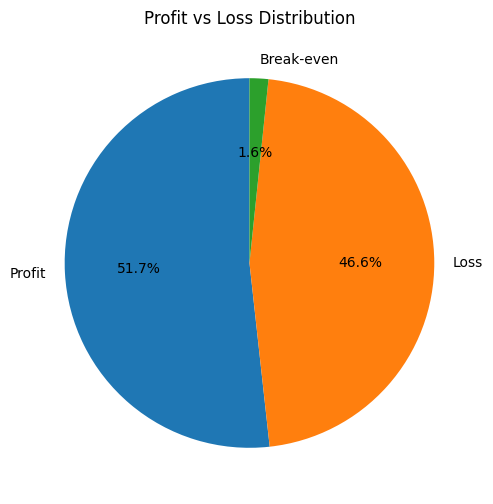

In [114]:
# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Profit vs Loss Distribution")
plt.show()